**Final project for Statistical Learning 760.**  \\

---

Train a Conv. Net. on CIFAR 10 Data and compare results with a random forest.

In [ ]:
#Imports
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from keras.utils import print_summary, to_categorical
import matplotlib.pyplot as plt
import sys
import os

#Test if GPU is working -> '/device:GPU:0'
import tensorflow as tf
tf.test.gpu_device_name()

In [2]:
# loading CIFAR 10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# normalize images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

# make CIFAR 10 labels categorical
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(f"New y_test shape: {y_test.shape}")
print(f"y_test sample: {y_test[0:1,]}")

123363328/170498071 [====================>.........] - ETA: 15s

170500096/170498071 [==============================] - 56s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
New y_test shape: (10000, 10)
y_test sample: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


# CNN MODEL

model_name = 'cifar_10_cnn'

# Model type
model = Sequential()
model.reset_states()

#Dropout rate
dropout_rate = 0.5

#Input
print(f"Input Shape: {x_train.shape[1:]}")

# CNN Layer 1
model.add(Conv2D(32, (3,3), strides=(1,1), padding='same',  use_bias=True, bias_initializer='zeros', kernel_initializer='he_normal', activation='relu', input_shape=x_train.shape[1:]))
model.add(BatchNormalization(center=False, scale=False))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(dropout_rate))

# CNN Layer 4
model.add(Conv2D(64, (3,3), strides=(1,1), padding='valid', use_bias=True, bias_initializer='zeros', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(center=False, scale=False))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(dropout_rate))

# CNN Layer 6
model.add(Conv2D(128, (3,3), strides=(1,1), padding='valid', use_bias=True, bias_initializer='zeros', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(center=False, scale=False))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(dropout_rate))

# Flatten
model.add(Flatten())          
          
# Fully Connected Later 5
model.add(Dense(256, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros' , name='fc_1')) 
model.add(BatchNormalization(center=False, scale=False))
model.add(Dropout(dropout_rate))

# Fully Connected Later 6
model.add(Dense(128, activation='relu', kernel_initializer='he_normal', bias_initializer='zeros', name='fc_2')) 
model.add(BatchNormalization(center=False, scale=True))
model.add(Dropout(dropout_rate))

# OUTPUT LAYER
model.add(Dense(num_classes, activation='softmax'))

# Summary 
model.summary()

Building CNN model.

Train the model.

In [9]:
# TRAINING

# Optimizer
optType = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0)
# optType = SGD(lr=0.01, momentum=0.9, decay=1e-4, nesterov=True)

# Configure model
model.compile(optimizer=optType, 
              loss='categorical_crossentropy',
              metrics=['accuracy']) #categorical_accuracy

# Train the model
history = model.fit(x=x_train, y=y_train,
          batch_size=128, 
          epochs=100, 
          verbose=2, 
          validation_split=0.1,
          shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 14s - loss: 2.3271 - acc: 0.2210 - val_loss: 1.9096 - val_acc: 0.2668
Epoch 2/100
 - 13s - loss: 1.8118 - acc: 0.3270 - val_loss: 1.7946 - val_acc: 0.3246
Epoch 3/100
 - 12s - loss: 1.6594 - acc: 0.3866 - val_loss: 1.8272 - val_acc: 0.3348
Epoch 4/100
 - 12s - loss: 1.5648 - acc: 0.4244 - val_loss: 1.8628 - val_acc: 0.3696
Epoch 5/100
 - 12s - loss: 1.4963 - acc: 0.4539 - val_loss: 1.5270 - val_acc: 0.4588
Epoch 6/100
 - 12s - loss: 1.4314 - acc: 0.4801 - val_loss: 1.4744 - val_acc: 0.4766
Epoch 7/100
 - 12s - loss: 1.3849 - acc: 0.5004 - val_loss: 1.5972 - val_acc: 0.4412
Epoch 8/100
 - 12s - loss: 1.3418 - acc: 0.5174 - val_loss: 1.5979 - val_acc: 0.4590
Epoch 9/100
 - 12s - loss: 1.3049 - acc: 0.5327 - val_loss: 1.4993 - val_acc: 0.4816
Epoch 10/100
 - 12s - loss: 1.2737 - acc: 0.5454 - val_loss: 1.7568 - val_acc: 0.4344
Epoch 11/100
 - 12s - loss: 1.2442 - acc: 0.5603 - val_loss: 1.1662 - val_acc: 0.5910
Epoch 12/100
 

 - 12s - loss: 1.0056 - acc: 0.6543 - val_loss: 0.8609 - val_acc: 0.7018
Epoch 35/100
 - 12s - loss: 1.0045 - acc: 0.6546 - val_loss: 0.8315 - val_acc: 0.7174
Epoch 36/100
 - 12s - loss: 1.0004 - acc: 0.6564 - val_loss: 0.8236 - val_acc: 0.7164
Epoch 37/100
 - 12s - loss: 0.9892 - acc: 0.6602 - val_loss: 0.8255 - val_acc: 0.7208
Epoch 38/100
 - 12s - loss: 0.9865 - acc: 0.6591 - val_loss: 0.8683 - val_acc: 0.7010
Epoch 39/100
 - 12s - loss: 0.9831 - acc: 0.6582 - val_loss: 0.8659 - val_acc: 0.7072
Epoch 40/100
 - 12s - loss: 0.9783 - acc: 0.6616 - val_loss: 0.8871 - val_acc: 0.6916
Epoch 41/100
 - 12s - loss: 0.9769 - acc: 0.6626 - val_loss: 0.9757 - val_acc: 0.6688
Epoch 42/100
 - 12s - loss: 0.9760 - acc: 0.6628 - val_loss: 1.0070 - val_acc: 0.6448
Epoch 43/100
 - 12s - loss: 0.9693 - acc: 0.6671 - val_loss: 0.8836 - val_acc: 0.6870
Epoch 44/100
 - 13s - loss: 0.9682 - acc: 0.6667 - val_loss: 0.8264 - val_acc: 0.7112
Epoch 45/100
 - 12s - loss: 0.9678 - acc: 0.6684 - val_loss: 0.9137

Epoch 68/100
 - 12s - loss: 0.9224 - acc: 0.6854 - val_loss: 1.1060 - val_acc: 0.6336
Epoch 69/100
 - 12s - loss: 0.9214 - acc: 0.6832 - val_loss: 0.9367 - val_acc: 0.6736
Epoch 70/100
 - 12s - loss: 0.9137 - acc: 0.6866 - val_loss: 0.7872 - val_acc: 0.7250
Epoch 71/100
 - 12s - loss: 0.9228 - acc: 0.6831 - val_loss: 0.8234 - val_acc: 0.7174
Epoch 72/100
 - 12s - loss: 0.9085 - acc: 0.6868 - val_loss: 0.8947 - val_acc: 0.6910
Epoch 73/100
 - 12s - loss: 0.9131 - acc: 0.6855 - val_loss: 0.8090 - val_acc: 0.7222
Epoch 74/100
 - 12s - loss: 0.9132 - acc: 0.6881 - val_loss: 0.7990 - val_acc: 0.7210
Epoch 75/100
 - 12s - loss: 0.9137 - acc: 0.6851 - val_loss: 0.7359 - val_acc: 0.7460
Epoch 76/100
 - 12s - loss: 0.9088 - acc: 0.6873 - val_loss: 0.7759 - val_acc: 0.7310
Epoch 77/100
 - 12s - loss: 0.9076 - acc: 0.6862 - val_loss: 1.1639 - val_acc: 0.6150
Epoch 78/100
 - 12s - loss: 0.9095 - acc: 0.6886 - val_loss: 0.8179 - val_acc: 0.7196
Epoch 79/100
 - 12s - loss: 0.8964 - acc: 0.6925 - val

Test the model and gather metrics

10000/10000 [==============================] - 2s 212us/step
Test loss: 0.7936539781570434
Test accuracy: 0.7229


Text(0.5,1,'Loss Curves')

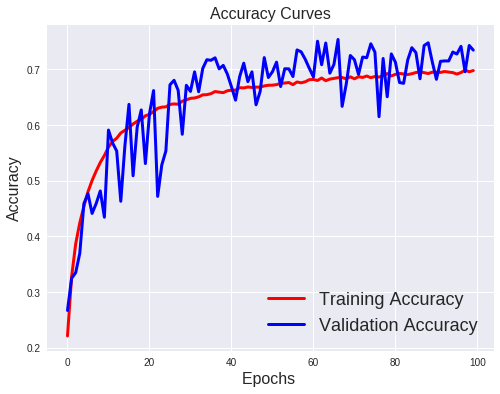

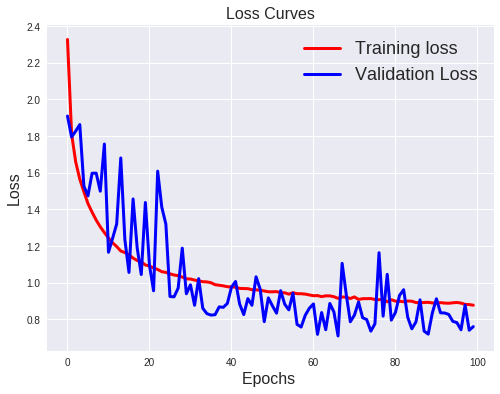

In [10]:
# TESTING AND METRICS

# Test loss and accuracy
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


# Accuracy plot
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [0]:
#Save Model as yaml file
from keras.models import load_model
from google.colab import files

# Download File
my_file_name = "cifar_10_model.h5";
model.save(my_file_name)
files.download(my_file_name)